## Library Imports

In [57]:
import os
import numpy as np
import pandas as pd

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [60]:
import tsfel
import pickle

In [61]:
activity = {
    1: "WALKING",
    2: "WALKING UPSTAIRS",
    3: "WALKING DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

## Sampler

In [62]:
def sampler(df):
    df_freq = df.iloc[::2]
    df_final = df_freq[100:600]
    return df_final

In [63]:
directory = "DataFiles"
sampled_dfs = []

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep=",")
        df_sampled = sampler(df.iloc[:, 1:4])
        sampled_dfs.append(df_sampled)

In [64]:
X_test = np.stack(sampled_dfs, axis=0)
y_test = np.array([6, 6, 6, 4, 4, 4, 5, 5, 5, 1, 1, 1, 3, 3, 3, 2, 2, 2])
print(X_test.shape)

(18, 500, 3)


## Import Models

In [65]:
with open('raw.pkl', 'rb') as f:
    raw_model = pickle.load(f)

In [66]:
with open('tsfel.pkl', 'rb') as f:
    tsfel_model = pickle.load(f)

In [67]:
with open('feature.pkl', 'rb') as f:
    feature_model = pickle.load(f)

## Q1

Accuracy: 0.17
Precision: 0.06
Recall: 0.17


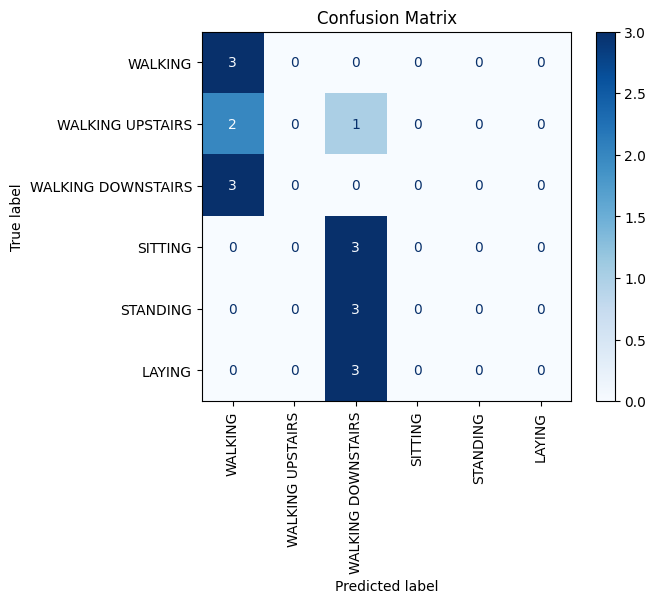

In [68]:
X_test_total_acc = np.sum(X_test**2, axis=2)
y_pred = raw_model.predict(X_test_total_acc)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

In [69]:
cfg = tsfel.get_features_by_domain()

X_test_total_acc = np.sum(X_test**2, axis=2)
X_tsfel_test = []
for i in range(X_test_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_test_total_acc[i], fs=50)
    X_tsfel_test.append(X_tsf.values)
X_tsfel_test = np.vstack(X_tsfel_test)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


Accuracy: 0.22
Precision: 0.20
Recall: 0.22


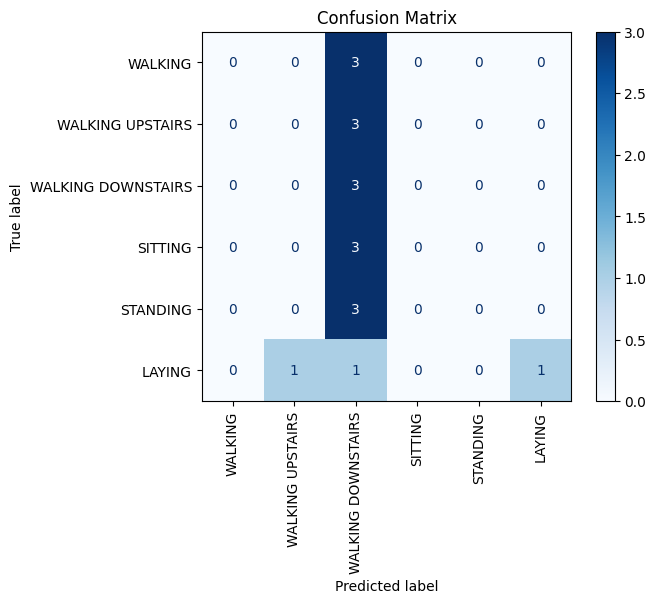

In [70]:
y_pred = tsfel_model.predict(X_tsfel_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.33
Precision: 0.14
Recall: 0.33


c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


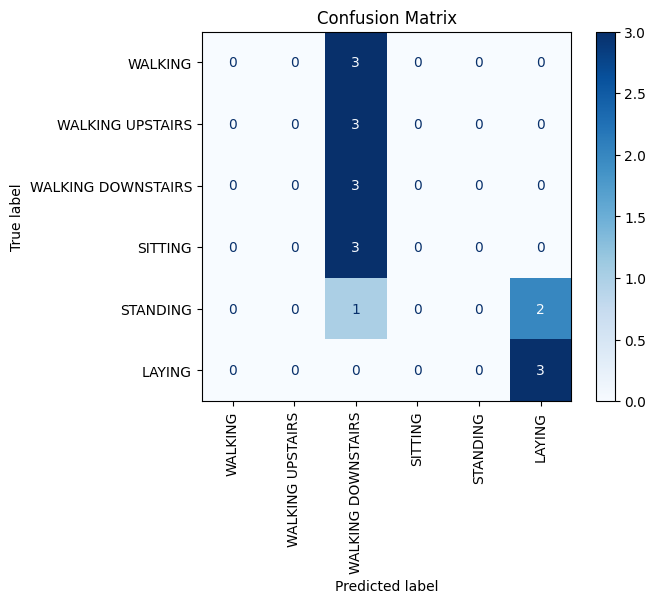

In [71]:
X_feature_test = np.pad(X_tsfel_test, ((0, 0), (0, 561 - X_tsfel_test.shape[1])), mode='constant')

y_pred = feature_model.predict(X_feature_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

The models performed poorly on the collected data. Some reasons could be:
1. The datapoints have been collected only for linear accelerometer so it could be missing data of other importatnt features like gyroscope.
2. The datapoints have not been preproccessed, and featurised leading to misleading figures and results.

Thus, the model cannot differentiate between Static and Dynamic activities, and there is a large overlap between them.

## Q2

In [72]:
scaler = StandardScaler()
for i in range(X_test.shape[0]):
    X_test[i] = scaler.fit_transform(X_test[i])

Accuracy: 0.17
Precision: 0.08
Recall: 0.17


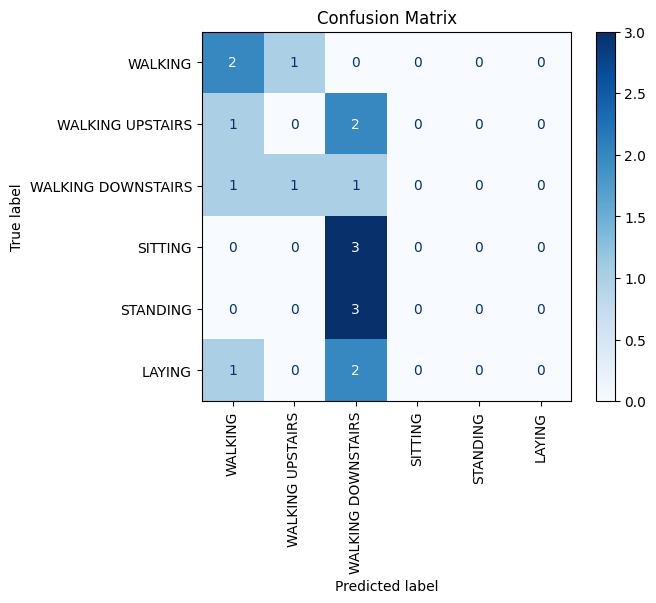

In [73]:
X_test_total_acc = np.sum(X_test**2, axis=2)
y_pred = raw_model.predict(X_test_total_acc)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

In [74]:
cfg = tsfel.get_features_by_domain()

X_test_total_acc = np.sum(X_test**2, axis=2)
X_tsfel_test = []
for i in range(X_test_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_test_total_acc[i], fs=50)
    X_tsfel_test.append(X_tsf.values)
X_tsfel_test = np.vstack(X_tsfel_test)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


Accuracy: 0.17
Precision: 0.03
Recall: 0.17


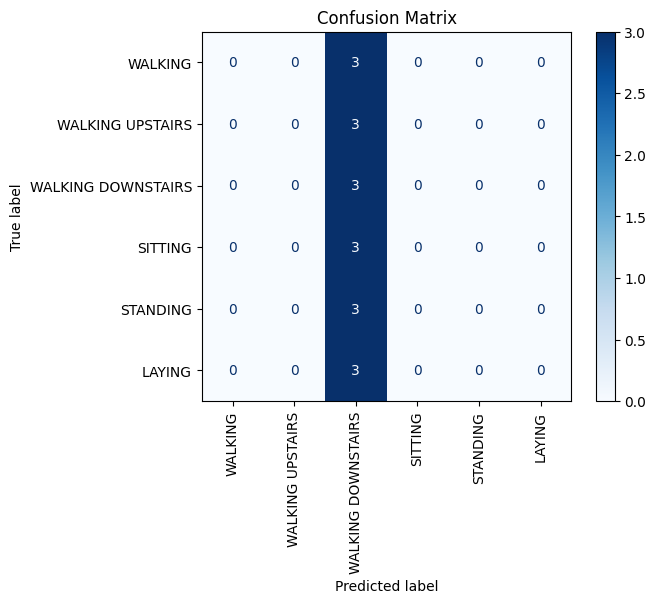

In [75]:
y_pred = tsfel_model.predict(X_tsfel_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.28
Precision: 0.14
Recall: 0.28


c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


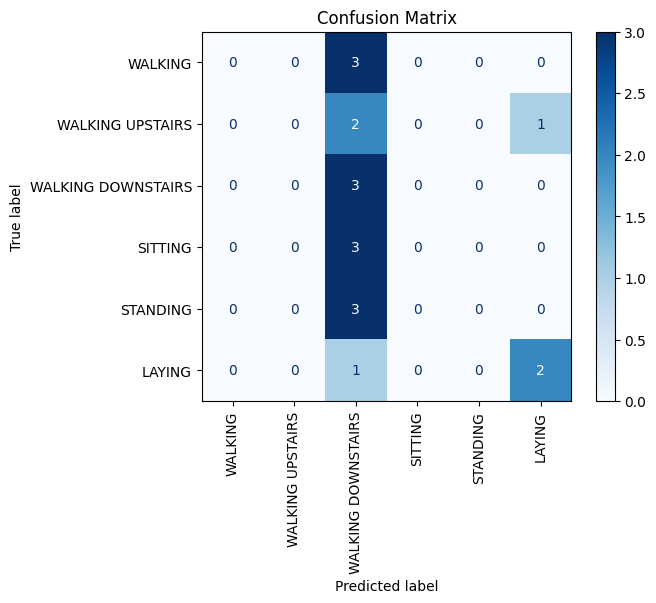

In [76]:
X_feature_test = np.pad(X_tsfel_test, ((0, 0), (0, 561 - X_tsfel_test.shape[1])), mode='constant')

y_pred = feature_model.predict(X_feature_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

After preprocessing the model performance of the raw data model improved, as it could now differentiate between Static and Dynamic activities with slight overlaps, but the TSFEL model continued to perform badly.

The featurised model works the best in both cases due to its large training data. However the data input also needs to be fetaurised, in which case since Gyroscope data was not collected, the number of features differ and we were not able to featurise the data properly.

## Q3

The accuracy of the few-shot model is around 5%, which is notably low. However, due to the small size of the test data, this result may not provide a reliable measure of the model's true performance.

In [77]:
%run MakeDataset.py

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [78]:
import os
from langchain_groq.chat_models import ChatGroq
from langchain_core.prompts import FewShotPromptTemplate,PromptTemplate


from dotenv import load_dotenv
load_dotenv()

Groq_Token = os.getenv("GROQ_API_KEY") # Do not share this key with anyone

groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

In [79]:
from MakeDataset import X_train,y_train

In [80]:
y_train.shape

(126,)

In [81]:
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}
y_train_mapping = np.vectorize(ACTIVITIES.get)(y_train)

In [82]:
y_train_mapping=pd.DataFrame(y_train_mapping)

In [83]:
y_train_mapping[0]

0      WALKING_UPSTAIRS
1                LAYING
2              STANDING
3      WALKING_UPSTAIRS
4      WALKING_UPSTAIRS
             ...       
121             WALKING
122             SITTING
123              LAYING
124    WALKING_UPSTAIRS
125    WALKING_UPSTAIRS
Name: 0, Length: 126, dtype: object

In [84]:
X_train_total_acc = np.sum(X_train**2, axis=2)
print(X_train_total_acc.shape)
cfg = tsfel.get_features_by_domain()
# X_tsfel = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_tsfel = []
feature_names = []
for i in range(X_train_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_train_total_acc[i], fs=50)
    X_tsfel.append(X_tsf.values)
    if feature_names == []:
        feature_names = X_tsf.columns.tolist()
X_tsfel = np.vstack(X_tsfel)

(126, 500)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [85]:
X_test_total_acc = np.sum(X_test**2, axis=2)
print(X_test_total_acc.shape)
cfg = tsfel.get_features_by_domain()
# X_tsfel = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_tsfel_test = []
feature_names_test = []
for i in range(X_test_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_test_total_acc[i], fs=50)
    X_tsfel_test.append(X_tsf.values)
    if feature_names_test == []:
        feature_names_test = X_tsf.columns.tolist()
X_tsfel_test = np.vstack(X_tsfel_test)

(54, 500)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [86]:
X_tsfel_test.shape

(54, 384)

In [87]:
import random
def create_few_shot_examples():

    unique_values = y_train_mapping[0].unique()
    results=[]
    # Iterate through each unique value
    for value in unique_values:
        # Get the indexes and values for the current unique value
        value_indexes = y_train_mapping.index[y_train_mapping[0]== value].tolist()
        value_values = y_train_mapping[0][y_train_mapping[0] == value].tolist()
        
        # Take only the first 5 indexes and values
        value_indexes = value_indexes[:5]
        value_values = value_values[:5]
        
        # Store the results as a tuple (value, indexes, values)
        results.append((value, value_indexes, value_values))

    # Print the results
    for result in results:
        value, indexes, values = result
        print(f"Value: {value}, Indexes: {indexes}, Values: {values}")
    few_shot_examples = []
    for i in range(5):
        for n in results[i][1]:
            example = {
                "query": ','.join(X_tsfel[n][-38:-10].astype(str)),  
                "answer": y_train_mapping[0].iloc[n] 
            }
            few_shot_examples.append(example)
    random.shuffle(few_shot_examples)
    return few_shot_examples


In [88]:
few_shot_examples=create_few_shot_examples()
test_predictions=[]
model_name="llama3-70b"
features_string=','.join((feature_names[-38:-10]))
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
system_prompt = f"""
    * You are a classifier. 
    * Your task is to classify human activities based on the featurized accelerometer data. 
    * The activities are WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING and LAYING.
    * Answer only in one word.
    * The features provided are in the following order seperated by a comma :
    {features_string}
""" 
example_prompt = PromptTemplate(
    input_variables=["query", "answer"], template="Question: {query}\n{answer}"
)

few_shot_prompt = FewShotPromptTemplate(
    examples=few_shot_examples,
    example_prompt=example_prompt,
    prefix=system_prompt,
    suffix="Based on these examples, classify the following activity:\n Question :{sentence}",
    input_variables=['sentence']
)

Value: WALKING_UPSTAIRS, Indexes: [0, 3, 4, 5, 15], Values: ['WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS']
Value: LAYING, Indexes: [1, 14, 23, 27, 35], Values: ['LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING']
Value: STANDING, Indexes: [2, 8, 22, 24, 29], Values: ['STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING']
Value: WALKING, Indexes: [6, 7, 10, 12, 13], Values: ['WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING']
Value: SITTING, Indexes: [9, 11, 19, 28, 36], Values: ['SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING']
Value: WALKING_DOWNSTAIRS, Indexes: [16, 20, 21, 26, 37], Values: ['WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS']


In [ ]:
for i, data in enumerate(X_tsfel_test):
    sentence = ",".join(X_tsfel_test[i][-38:-10].astype(str))
    prompt = few_shot_prompt.format(sentence=sentence)
    ans = llm.invoke(prompt)
    print(i,ans.content)
    test_predictions.append(ans.content)

0 WALKING_UPSTAIRS
1 LAYING
2 WALKING_UPSTAIRS
3 WALKING_UPSTAIRS
4 WALKING_UPSTAIRS
5 WALKING_UPSTAIRS
6 WALKING_UPSTAIRS
7 WALKING_UPSTAIRS
8 WALKING_UPSTAIRS
9 WALKING_UPSTAIRS
10 WALKING_UPSTAIRS
11 WALKING_UPSTAIRS
12 WALKING_UPSTAIRS
13 WALKING_UPSTAIRS
14 WALKING_UPSTAIRS
15 WALKING_UPSTAIRS
16 WALKING_UPSTAIRS
17 WALKING_UPSTAIRS


In [91]:
pred=pd.DataFrame(test_predictions)
pred.to_csv(f"few_shot_{model_name}_collected_data.csv")

In [92]:
f_s1=pd.read_csv("few_shot_llama3-70b_collected_data.csv")
f_s1['0']

0     WALKING_UPSTAIRS
1     WALKING_UPSTAIRS
2     WALKING_UPSTAIRS
3               LAYING
4     WALKING_UPSTAIRS
5     WALKING_UPSTAIRS
6     WALKING_UPSTAIRS
7               LAYING
8             STANDING
9     WALKING_UPSTAIRS
10    WALKING_UPSTAIRS
11            STANDING
12    WALKING_UPSTAIRS
13             WALKING
14              LAYING
15            STANDING
16              LAYING
17            STANDING
18              LAYING
19             WALKING
20              LAYING
21              LAYING
22    WALKING_UPSTAIRS
23              LAYING
24              LAYING
25    WALKING_UPSTAIRS
26    WALKING_UPSTAIRS
27    WALKING_UPSTAIRS
28             WALKING
29              LAYING
Name: 0, dtype: object

In [93]:
y_test=pd.DataFrame(y_test)

In [94]:
y_test_mapping=y_test[0].map(ACTIVITIES)

In [ ]:
matches=(f_s1['0']==y_test_mapping).sum()
print(matches)
accuracy = matches.sum() / len(f_s1)
recall=recall_score(y_test_mapping,f_s1['0'],average='macro')
precision=precision_score(y_test_mapping,f_s1['0'],average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

1
Accuracy: 5.56%
Recall: 0.05
Precision: 0.14


c:\Users\hhp40\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hhp40\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test_mapping

0                 LAYING
1                 LAYING
2                 LAYING
3                SITTING
4                SITTING
5                SITTING
6               STANDING
7               STANDING
8               STANDING
9                WALKING
10               WALKING
11               WALKING
12    WALKING DOWNSTAIRS
13    WALKING DOWNSTAIRS
14    WALKING DOWNSTAIRS
15      WALKING UPSTAIRS
16      WALKING UPSTAIRS
17      WALKING UPSTAIRS
Name: 0, dtype: object

## Q4

The accuracy of the model is approximately 27%, which is better than the accuracy achieved on the UCI HAR dataset. However, considering the small size of the test data, this result may not be sufficient to accurately assess the model's efficiency.

In [96]:
def sampler(df,a, b):
    df_freq = df.iloc[::2]
    df_final = df_freq[a:b]
    return df_final

In [97]:
directory = "DataFiles"
sampled_dfs = []
train=[]
test=[]

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(filename[:-6])
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep=",")
        df_sampled = sampler(df.iloc[:, 1:4],100,500)
        print(len(df))
        test.append(filename[:-6])
        t=sampler(df.iloc[:,1:4],0,100)
        print(len(t),len(df_sampled))
        sampled_dfs.append(df_sampled)
        train.append(t)

Laying
3493
100 400
Laying
3645
100 400
Laying
3895
100 400
Sitting
2554
100 400
Sitting
2346
100 400
Sitting
2527
100 400
Standing
2537
100 400
Standing
2265
100 400
Standing
2246
100 400
Walking
2841
100 400
Walking
3060
100 400
Walking
2915
100 400
Walking_Downstairs
1671
100 400
Walking_Downstairs
1799
100 400
Walking_Downstairs
1860
100 400
Walking_Upstairs
1680
100 400
Walking_Upstairs
1899
100 400
Walking_Upstairs
2047
100 400


In [98]:
X_train=np.stack(train,axis=0)
y_train=np.array(test)
X_test = np.stack(sampled_dfs, axis=0)
y_test = np.array([6, 6, 6, 4, 4, 4, 5, 5, 5, 1, 1, 1, 3, 3, 3, 2, 2, 2])
print(X_test.shape)

(18, 400, 3)


In [99]:
y_train_mapping=pd.DataFrame(y_train)

In [100]:
y_train_mapping[0]

0                 Laying
1                 Laying
2                 Laying
3                Sitting
4                Sitting
5                Sitting
6               Standing
7               Standing
8               Standing
9                Walking
10               Walking
11               Walking
12    Walking_Downstairs
13    Walking_Downstairs
14    Walking_Downstairs
15      Walking_Upstairs
16      Walking_Upstairs
17      Walking_Upstairs
Name: 0, dtype: object

In [101]:
X_train_total_acc = np.sum(X_train**2, axis=2)
print(X_train_total_acc.shape)
cfg = tsfel.get_features_by_domain()
# X_tsfel = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_tsfel = []
feature_names = []
for i in range(X_train_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_train_total_acc[i], fs=50)
    X_tsfel.append(X_tsf.values)
    if feature_names == []:
        feature_names = X_tsf.columns.tolist()
X_tsfel = np.vstack(X_tsfel)

(18, 100)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [102]:
X_test_total_acc = np.sum(X_test**2, axis=2)
print(X_test_total_acc.shape)
cfg = tsfel.get_features_by_domain()
# X_tsfel = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_tsfel_test = []
feature_names_test = []
for i in range(X_test_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_test_total_acc[i], fs=50)
    X_tsfel_test.append(X_tsf.values)
    if feature_names_test == []:
        feature_names_test = X_tsf.columns.tolist()
X_tsfel_test = np.vstack(X_tsfel_test)

(18, 400)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [103]:
X_tsfel_test.shape

(18, 334)

In [104]:
def create_few_shot_examples():

    unique_values = y_train_mapping[0].unique()
    results=[]
    # Iterate through each unique value
    for value in unique_values:
        # Get the indexes and values for the current unique value
        value_indexes = y_train_mapping.index[y_train_mapping[0]== value].tolist()
        value_values = y_train_mapping[0][y_train_mapping[0] == value].tolist()
        
        # Take only the first 5 indexes and values
        value_indexes = value_indexes[:5]
        value_values = value_values[:5]
        
        # Store the results as a tuple (value, indexes, values)
        results.append((value, value_indexes, value_values))

    # Print the results
    for result in results:
        value, indexes, values = result
        print(f"Value: {value}, Indexes: {indexes}, Values: {values}")
    few_shot_examples = []
    for i in range(5):
        for n in results[i][1]:
            example = {
                "query": ','.join(X_tsfel[n][-38:-10].astype(str)),  
                "answer": y_train_mapping[0].iloc[n] 
            }
            few_shot_examples.append(example)
    random.shuffle(few_shot_examples)
    return few_shot_examples


In [ ]:
few_shot_examples=create_few_shot_examples()
test_predictions=[]
model_name="llama3-70b"
features_string=','.join((feature_names[-38:-10]))
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
system_prompt = f"""
    * You are a classifier. 
    * Your task is to classify human activities based on the featurized accelerometer data. 
    * The activities are WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING and LAYING.
    * Answer only in one word.
    * The features provided are in the following order seperated by a comma :
    {features_string}
""" 
example_prompt = PromptTemplate(
    input_variables=["query", "answer"], template="Question: {query}\n{answer}"
)

few_shot_prompt = FewShotPromptTemplate(
    examples=few_shot_examples,
    example_prompt=example_prompt,
    prefix=system_prompt,
    suffix="Based on these examples, classify the following activity:\n Question :{sentence}",
    input_variables=['sentence']
)





Value: Laying, Indexes: [0, 1, 2], Values: ['Laying', 'Laying', 'Laying']
Value: Sitting, Indexes: [3, 4, 5], Values: ['Sitting', 'Sitting', 'Sitting']
Value: Standing, Indexes: [6, 7, 8], Values: ['Standing', 'Standing', 'Standing']
Value: Walking, Indexes: [9, 10, 11], Values: ['Walking', 'Walking', 'Walking']
Value: Walking_Downstairs, Indexes: [12, 13, 14], Values: ['Walking_Downstairs', 'Walking_Downstairs', 'Walking_Downstairs']
Value: Walking_Upstairs, Indexes: [15, 16, 17], Values: ['Walking_Upstairs', 'Walking_Upstairs', 'Walking_Upstairs']


In [105]:
for i in range(13,len(X_tsfel_test)):
    sentence = ",".join(X_tsfel_test[i][-38:-10].astype(str))
    prompt = few_shot_prompt.format(sentence=sentence)
    ans = llm.invoke(prompt)
    print(i,ans.content)
    test_predictions.append(ans.content)

13 WALKING_UPSTAIRS
14 WALKING_UPSTAIRS
15 WALKING_UPSTAIRS
16 WALKING_UPSTAIRS
17 WALKING_UPSTAIRS


In [106]:
len(test_predictions)

35

In [107]:
pred=pd.DataFrame(test_predictions)
pred.to_csv(f"few_shot_{model_name}_collected_data_1.csv")

In [108]:
f_s2=pd.read_csv("few_shot_llama3-70b_collected_data_1.csv")
f_s2['0']

0     WALKING_UPSTAIRS
1     WALKING_UPSTAIRS
2     WALKING_UPSTAIRS
3               LAYING
4     WALKING_UPSTAIRS
5     WALKING_UPSTAIRS
6     WALKING_UPSTAIRS
7               LAYING
8             STANDING
9     WALKING_UPSTAIRS
10    WALKING_UPSTAIRS
11            STANDING
12    WALKING_UPSTAIRS
13             WALKING
14              LAYING
15            STANDING
16              LAYING
17            STANDING
18              LAYING
19             WALKING
20              LAYING
21              LAYING
22    WALKING_UPSTAIRS
23              LAYING
24              LAYING
25    WALKING_UPSTAIRS
26    WALKING_UPSTAIRS
27    WALKING_UPSTAIRS
28             WALKING
29              LAYING
30    WALKING_UPSTAIRS
31    WALKING_UPSTAIRS
32    WALKING_UPSTAIRS
33    WALKING_UPSTAIRS
34    WALKING_UPSTAIRS
Name: 0, dtype: object

In [109]:
ACTIVITIES = {
    1: 'Walking'            ,
    2: 'Walking_Upstairs'   ,
    3: 'Walking_Downstairs' ,
    4: 'Sitting'            ,
    5: 'Standing'           ,
    6: 'Laying'             ,
}
y_test=pd.DataFrame(y_test)
y_test_mapping=y_test[0].map(ACTIVITIES)

In [110]:
y_test_mapping

0                 Laying
1                 Laying
2                 Laying
3                Sitting
4                Sitting
5                Sitting
6               Standing
7               Standing
8               Standing
9                Walking
10               Walking
11               Walking
12    Walking_Downstairs
13    Walking_Downstairs
14    Walking_Downstairs
15      Walking_Upstairs
16      Walking_Upstairs
17      Walking_Upstairs
Name: 0, dtype: object

In [ ]:
matches=(f_s2['0']==y_test_mapping).sum()
print(matches)
accuracy = matches.sum() / len(f_s2)
recall=recall_score(y_test_mapping,f_s2['0'],average='macro')
precision=precision_score(y_test_mapping,f_s2['0'],average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

5
Accuracy: 27.78%
Recall: 0.28
Precision: 0.11


c:\Users\hhp40\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
